In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Transformed_Housing_Data2.csv")

In [3]:
data.head(5)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


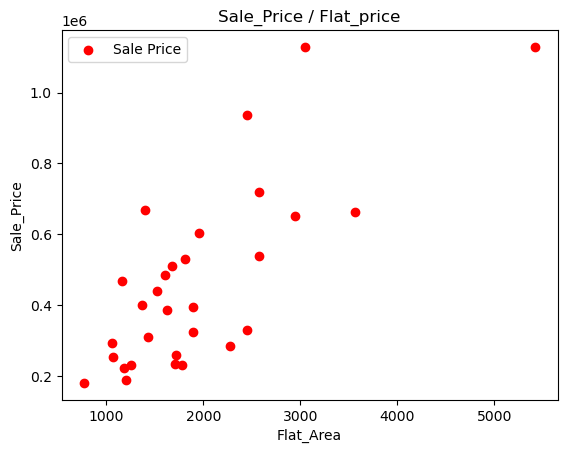

In [5]:
plt.figure(dpi=100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red', label='Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price / Flat_price")
plt.legend()
plt.show()

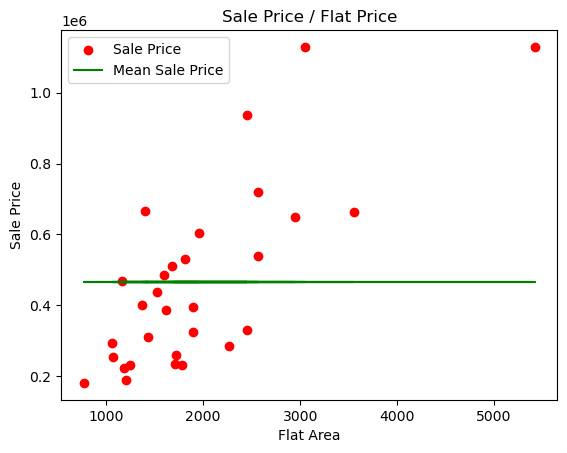

In [6]:
sample_data["mean_sale_price"] = sample_data['sale_price'].mean()

plt.figure(dpi=100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red', label='Sale Price')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color ='green', label = 'Mean Sale Price')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price / Flat Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

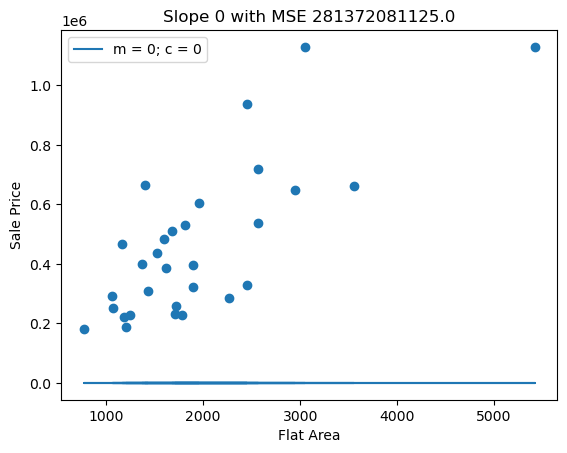

In [7]:
from sklearn import metrics
# Best fit line using parametes m and c
# initialising slope m and intercept c as 0
m = 0
c = 0
# creating an empty list to store the computed values of the y
line = []
#loop to calculate y=mx+c and storing values in list
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi=100)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label ='m = 0; c = 0')
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.legend()
#calculating the error wrt to line 
MSE = metrics.mean_squared_error(sample_data.sale_price, line)
plt.title('Slope ' +str(m)+" with MSE "+ str(MSE))

in the above graph we can se that the line is not best fit and finding the best fit line by hit and trial (taking diff value of m and c) method is a tiredeous and iterative task, so lets automate the process

In [8]:
# func for finding the right value of slope
def slope_error(slope, intercept, sample_data):
    sale=[] # store the points predicted by the line with slope m
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]*slope+intercept
        sale.append(tmp)
    MSE = metrics.mean_squared_error(sample_data.sale_price, sale)
    return MSE

In [9]:
slope = [i/10 for i in range(0,5000)] # defining range of diff value of slopes
cost = [] # store values returned by function slope_error
# loop passes every elemnt of the list slope and stores the error in list cost
# value of intercept c is constant 
for i in slope:
    temp = slope_error(slope = i, intercept = 0, sample_data = sample_data)
    cost.append(temp)
# cost of model is MSE of model 

In [10]:
# arranging in dataframe
cost_table = pd.DataFrame({
    'slope': slope,
    'cost': cost
})
cost_table.tail(5)

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


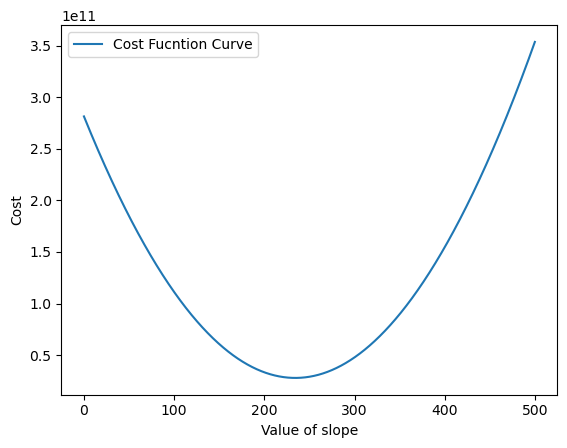

In [11]:
#plotting the cost values corres. to every values of beta
plt.plot(cost_table.slope, cost_table.cost, label='Cost Fucntion Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()
# best way to understand errors corres to diff. line wtih diff. slopes

In [12]:
# func for finding the right value of intercept
def intercept_error(slope, intercept, sample_data):
    sale=[] # store the points predicted by the line with slope m
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]*slope+intercept
        sale.append(tmp)
    MSE = metrics.mean_squared_error(sample_data.sale_price, sale)
    return MSE

In [13]:
intercept = [i for i in range(5000, 50000)]
cost = []
# slope = 234 from the above graph
for i in intercept:
    temp = intercept_error(slope = 234, intercept = i, sample_data = sample_data)
    cost.append(temp)

In [14]:
# arranging in dataframe
cost_table = pd.DataFrame({
    'intercept': intercept,
    'cost': cost
})
cost_table.head(5)

,intercept,cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


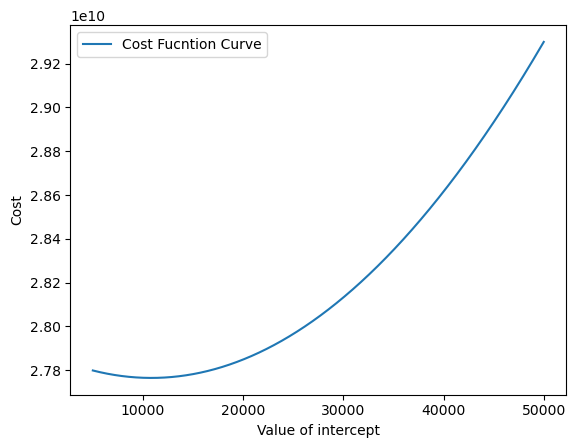

In [15]:
#plotting the cost values corres. to every values of beta
plt.plot(cost_table.intercept, cost_table.cost, label='Cost Fucntion Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()
# best way to understand errors corres to diff. line wtih diff. intercept

In [16]:
slope = [i/10 for i in range(0,5000)] 
cost = [] 
# value of intercept c is 10834 from above graph
for i in slope:
    temp = slope_error(slope = i, intercept = 10834, sample_data = sample_data)
    cost.append(temp) 

In [17]:
# arranging in dataframe
cost_table = pd.DataFrame({
    'slope': slope,
    'cost': cost
})
cost_table.tail(5)

,slope,cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


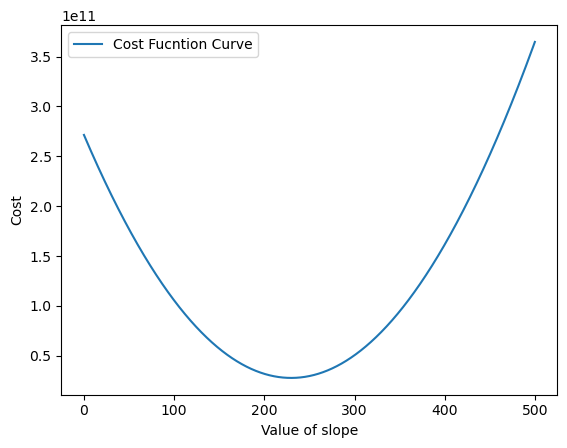

In [18]:
#plotting the cost values corres. to every values of beta
plt.plot(cost_table.slope, cost_table.cost, label='Cost Fucntion Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()
# best way to understand errors corres to diff. line wtih diff. slopes

# Gradient Descent Algorithm

In [19]:
# step 1, initialising the parameters

# function to initialise the parameters, this fn takes only target variable as it's parameter

def parameter(Y):  
    '''Y = target variable
    returns initialised values of m and c'''
    m = 0.1
    c = Y.mean()
    return m, c

In [20]:
# Step 2, Generate Predictions
def generate_predictions(m, c, X):
    '''X = independent Variables
    return prediction generated by line with parameters m, c'''
    
    prediction = []
    for x in X:
        pred = (m*x)+c
        prediction.append(pred)
    return prediction
# returns list containing predictions of every value in X wrt m & c using Y = mx + c


In [21]:
# step 3 , calculate the cost(MSE)
def compute_cost(prediction, Y):
    '''returns the mean squared error b/w the 
    prediction and Y'''
    
    cost = np.sum(((prediction - Y)**2)/len(Y))
    return cost

In [22]:
# step 4, updating the parameters
def gradients(prediction, Y, X): # for calculating gradients
    '''returns Gradients coreesponding to m and c
    '''
    n = len(Y)
    gm = 2/n * np.sum((prediction - Y) * X)
    gc = 2/n * np.sum((prediction - Y))
    return gm, gc

In [23]:
# updating parameters 
def para_update(m_old, c_old, gm_old, gc_old, alpha):
    '''update and return the new values of m and c'''
    
    m_new = m_old - alpha * gm_old
    c_new = c_old - alpha * gc_old
    return m_new, c_new

In [24]:
def result(m, c, X, Y, cost, predictions, i):
    '''Print and plot the final result obtained from gradient descent'''
    ## if the gradient descent converged to the optimum value before max_iter
    if i < max_iter - 1:
        print("***** Gradient Descent has Converged at iteraton {} *****".format(i))
    else:
        print("****** Result After ******", max_iter, 'iterations is: ******')
    
    ## plotting the final result
    plt.figure(figsize = (14,7), dpi = 120)
    plt.scatter(X, Y, color = 'red', label = 'data points')
    label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
    plt.plot(X, predictions, color = 'green', label = label)
    plt.xlabel('flat area')
    plt.ylabel('sale price')
    plt.title('final regression line')
    plt.legend()

After Iteration 0 : m = 3499072.307222223 ; c = 465999.44299999997 ; Cost= 64177937552.075005
After Iteration 20 : m = 7.115927055971628e+105 ; c = 2.997778392048355e+102 ; Cost= 2.7417231010181384e+208
After Iteration 40 : m = 1.447154337383132e+205 ; c = 6.096532424296826e+201 ; Cost= inf
After Iteration 60 : m = 2.9430538842431367e+304 ; c = 1.2398417341018387e+301 ; Cost= inf
After Iteration 80 : m = nan ; c = nan ; Cost= nan
After Iteration 100 : m = nan ; c = nan ; Cost= nan
After Iteration 120 : m = nan ; c = nan ; Cost= nan
After Iteration 140 : m = nan ; c = nan ; Cost= nan
After Iteration 160 : m = nan ; c = nan ; Cost= nan
After Iteration 180 : m = nan ; c = nan ; Cost= nan
After Iteration 200 : m = nan ; c = nan ; Cost= nan
After Iteration 220 : m = nan ; c = nan ; Cost= nan
After Iteration 240 : m = nan ; c = nan ; Cost= nan
After Iteration 260 : m = nan ; c = nan ; Cost= nan
After Iteration 280 : m = nan ; c = nan ; Cost= nan
After Iteration 300 : m = nan ; c = nan ; Cost

C:\Users\anubh\AppData\Local\Temp\ipykernel_14620\1589649572.py:6: RuntimeWarning: overflow encountered in square
  cost = np.sum(((prediction - Y)**2)/len(Y))
C:\Users\anubh\AppData\Local\Temp\ipykernel_14620\803530563.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(cost_new - cost_old) < 10**(-7):
C:\Users\anubh\AppData\Local\Temp\ipykernel_14620\2250476318.py:6: RuntimeWarning: overflow encountered in multiply
  gm = 2/n * np.sum((prediction - Y) * X)
C:\Users\anubh\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\anubh\AppData\Local\Temp\ipykernel_14620\535177024.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  m_new = m_old - alpha * gm_old
C:\Users\anubh\AppData\Local\Temp\ipykernel_14620\535177024.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  c_new = c_old - alpha * gc_old


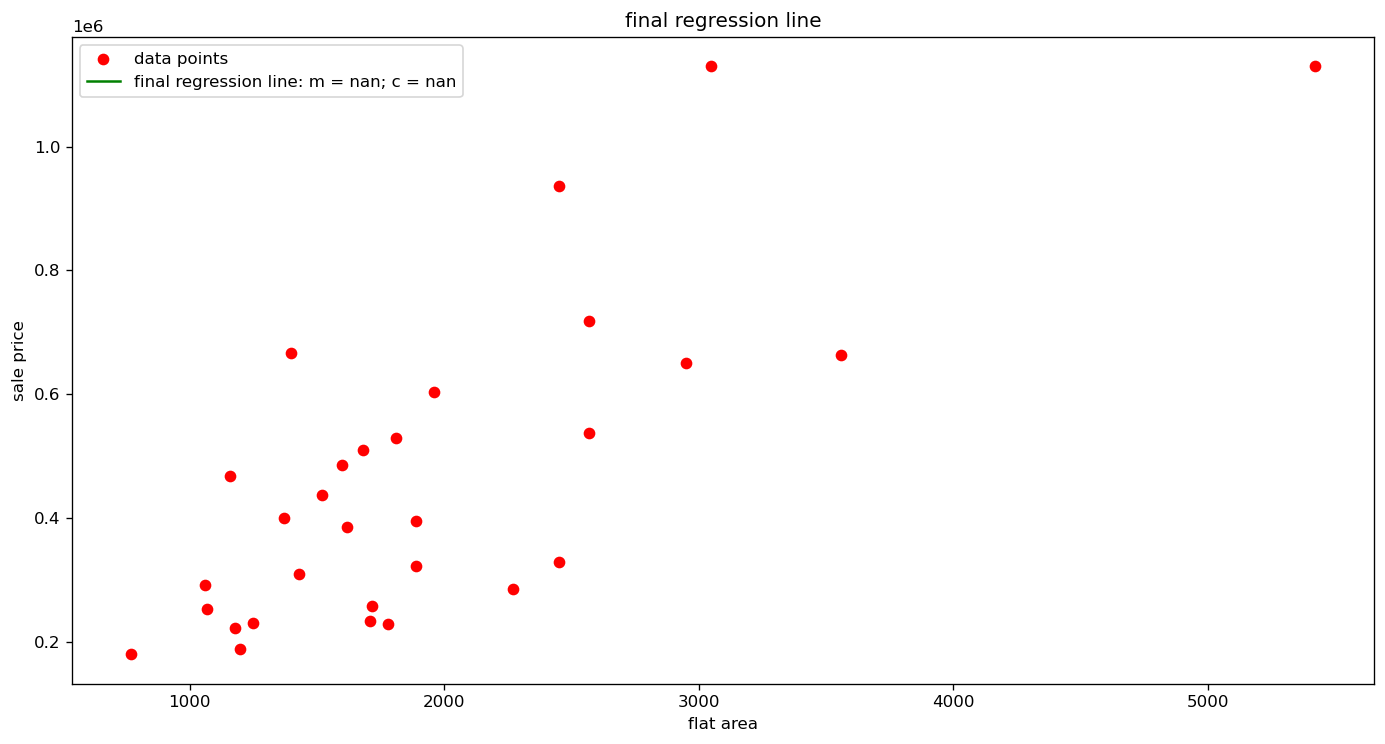

In [25]:
## defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: initialising the values of m, c
m, c = parameter(sale_price)

## Gradient Descent in Action
for i in range(0, max_iter):
    
    ## Step 2: generating predictions
    predictions = generate_predictions(m, c , flat_area)
    
    ## Step 3: Calculating Cost
    cost_new = compute_cost(predictions, sale_price)
    
    ## checking if GD converged 
    if abs(cost_new - cost_old) < 10**(-7):
        break
    ## calculating gradients 
    gm, gc = gradients(predictions, sale_price, flat_area)
    
    ## Step 4: updating parameters m and c
    m, c = para_update(m, c, gm, gc, alpha)
    
    ## display result after every 20 iterations
    if i%20==0:
        print("After Iteration", i,': m =',m, '; c =',c,'; Cost=', cost_new)
    
    ## updating cost_old
    cost_old = cost_new
    
## final results
result(m, c, flat_area, sale_price, cost_new, predictions, i)

After Iteration 0 : m = 0.23163464136333034 ; c = 1.1916393797643346e-16 ; Cost= 0.85836535863667
After Iteration 20 : m = 0.752102630465492 ; c = 1.6690352803531518e-16 ; Cost= 0.42523096955478523
***** Gradient Descent has Converged at iteraton 33 *****


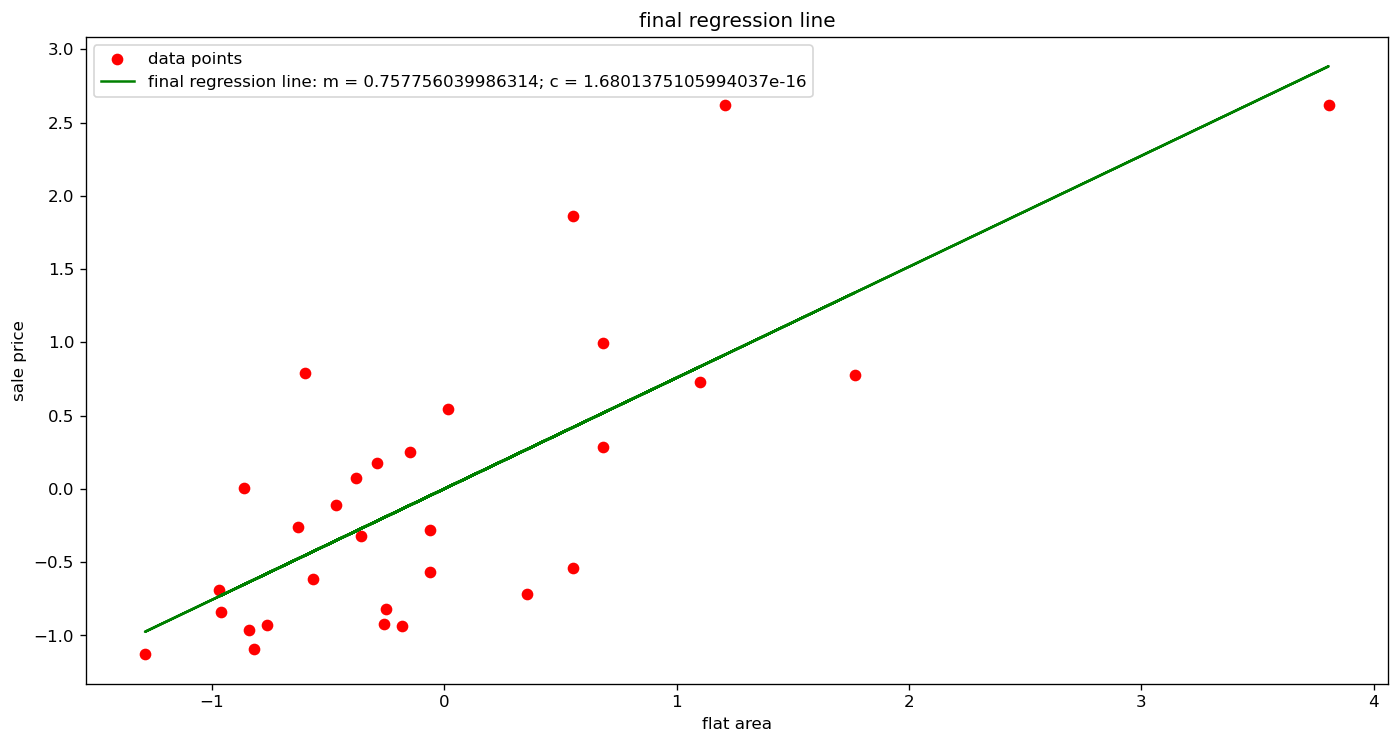

In [26]:
## scaling the data since the cost value above explodes to infinity due to large data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))
## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.1

## Step 1: initialising the values of m, c
m, c = parameter(sale_price)

## Gradient Descent in Action
for i in range(0, max_iter):
    
    ## Step 2: generating predictions
    predictions = generate_predictions(m, c , flat_area)
    
    ## Step 3: Calculating Cost
    cost_new = compute_cost(predictions, sale_price)
    
    ## checking if GD converged 
    if abs(cost_new - cost_old) < 10**(-7):
        break
    ## calculating gradients 
    gm, gc = gradients(predictions, sale_price, flat_area)
    
    ## Step 4: updating parameters m and c
    m, c = para_update(m, c, gm, gc, alpha)
    
    ## display result after every 20 iterations
    if i%20==0:
        print("After Iteration", i,': m =',m, '; c =',c,'; Cost=', cost_new)
    
    ## updating cost_old
    cost_old = cost_new
    
## final results
result(m, c, flat_area, sale_price, cost_new, predictions, i)

# Linear Regression implementation

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [28]:
data = pd.read_csv("Transformed_Housing_Data2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


# Scaling the dataset

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price'], axis = 1))
X = pd.DataFrame(data = X, columns = data.drop(columns = ["Sale_Price"]).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Checking  and Removing Multicollinearity

In [30]:
X.corr()

# there are almost 900 values correlated to each other hence it is tedious to work through all thiese values

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [31]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
# list comprehension to store pairs of independent variables in the final list
# i and j (rows & columns) will take every possible combination of the independent variables
z = [[str(i), str(j)] for i in k.columns for j in k.columns 
     if (k.loc[i,j] > abs(0.5) and (i!=j))]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

# Calculating VIF 

In [32]:
# VIF is used to remove the multicollinearity or variables from the above
# importing variance_inflation_factor function from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## claculating VIF for every column and storing in pandas.Series 
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) 
                for i in range(vif_data.shape[1])], index = vif_data.columns)
# index is used for indexing each value of VIF to its corres. independent var name 
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [33]:
# getting and removing the variable with highest VIF
VIF[VIF == VIF.max()].index[0] # index will return the index of max value stored

'Flat Area (in Sqft)'

In [34]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0], 'has been removed')
        data = data.drop(columns = [vif[vif == vif.max()].index[0]])
        return data
    else:
        print('No Multi-collinearity present anymore')
        return data

In [35]:
# above we observed 7 independent var exhibiting multicollinearity
for i in range(7):
    vif_data = MC_remover(vif_data) # updated vif_data after iteratively removing multicollinearity

vif_data.head()

# removing one var may result in decrese of VIF of other variables hence other variables may not be removed
    

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multi-collinearity present anymore
No Multi-collinearity present anymore
No Multi-collinearity present anymore
No Multi-collinearity present anymore
No Multi-collinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Remaining Columns

In [36]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) 
                for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF
# none of the remaining variables have VIF > 5

No of Bedrooms                               1.638990
No of Bathrooms                              3.373805
Lot Area (in Sqft)                           2.107495
No of Floors                                 2.127703
No of Times Visited                          1.432363
Overall Grade                                2.956967
Area of the House from Basement (in Sqft)    4.580042
Basement Area (in Sqft)                      1.974981
Age of House (in Years)                      2.626504
Latitude                                     2.471343
Longitude                                    1.672667
Living Area after Renovation (in Sqft)       3.063886
Lot Area after Renovation (in Sqft)          2.144068
Years Since Renovation                       2.788064
Condition_of_the_House_Excellent             1.206487
Condition_of_the_House_Good                  1.251488
Condition_of_the_House_Okay                  1.025386
Ever_Renovated_Yes                           2.955539
Waterfront_View_Yes         

# Train/Test Set

In [37]:
X = vif_data # new independent variable data
y = data['Sale_Price']

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X ,Y, test_size = 0.2, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17287, 28), (4322, 28), (17287,), (4322,))

In [38]:
# implementation of linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression() # normalize the independent variables so that LR no need to find value of intercept
model.fit(x_train, y_train)

LinearRegression()

In [39]:
# coefficients corres to independent var that LR has calculated
# y = m0 + m1x1 + m2x2 + ..... + MnXn
model.coef_
# since data is normalized m0 = 0

array([ -4297.10733646,  12519.1227061 ,  13868.03946395,   2366.69257363,
        27508.79283562,  58615.89591896,  80774.19004152,  27848.89364605,
        27545.54527327,  21983.805804  , -23724.02954379,  18852.4171612 ,
        -2515.08937044,  -9789.56218463,  14117.67019773,   5497.47851974,
        -1801.77780851,  14092.18576534,  10130.26331652,  12171.37176972,
        34152.81938748,  62592.1129901 ,  81026.2489289 ,  50542.30791991,
        73443.47482989,  40442.55730591,  67582.76264298,  22399.66670472])

In [40]:
predictions = model.predict(x_test)
model.score(x_test, y_test) # evaluation 

0.8471359526422079

# verifying assumptions of LR

# 1. Residuals

In [41]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals': residuals,
                              'predictions': predictions})
residual_table = residual_table.sort_values(by = 'predictions') # sorting since we have multiple independent variables


In [42]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

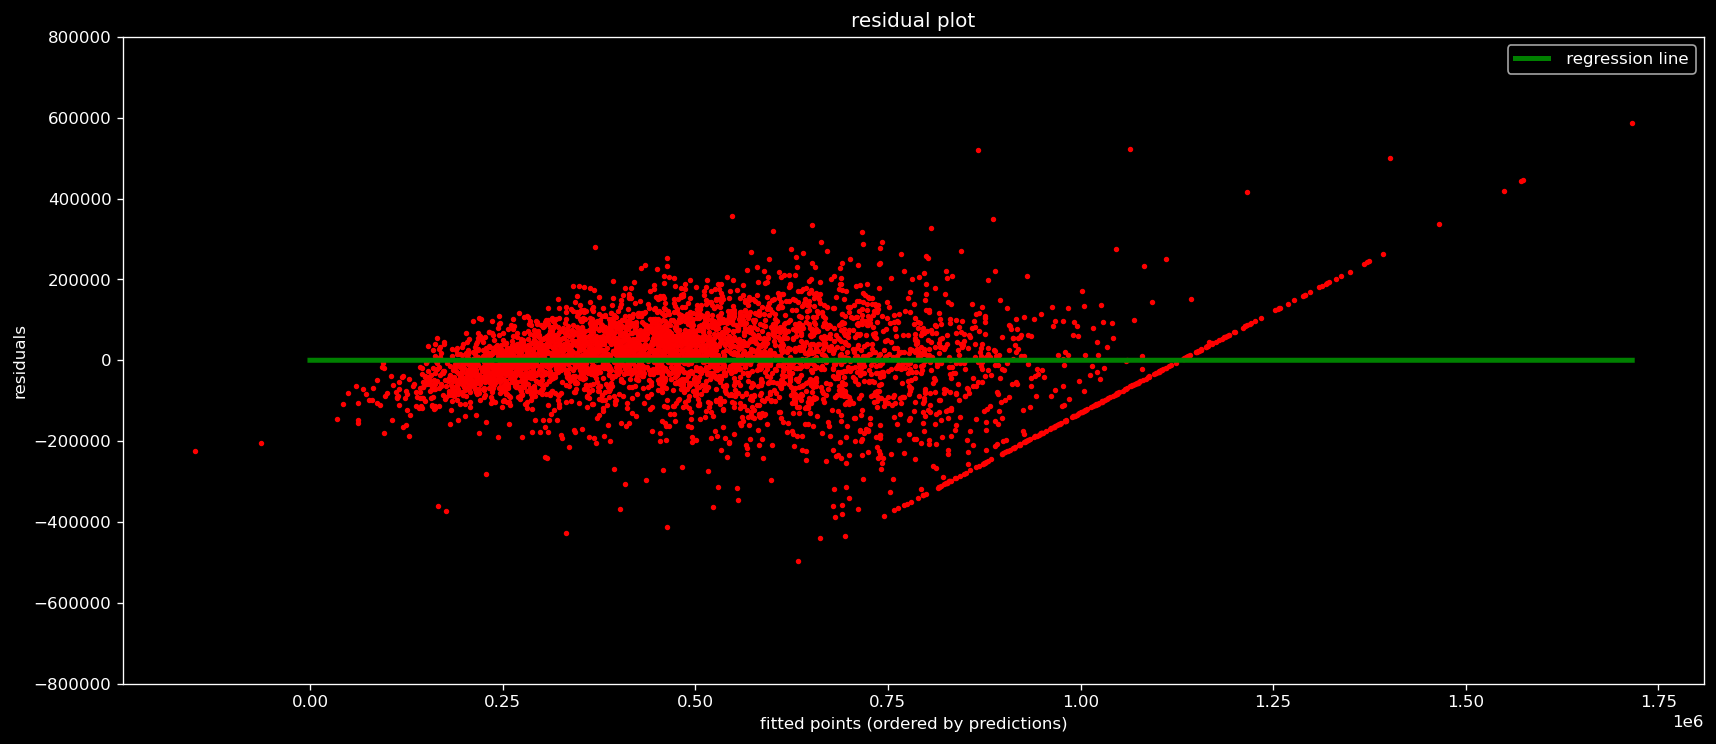

In [43]:
plt.figure(dpi = 120, figsize = (17,7))
plt.scatter(residual_table['predictions'], residual_table['residuals'], color = 'red', s = 5)
plt.plot(z, k, color = 'green', linewidth = 3, label =' regression line')
plt.ylim(-800000, 800000)
plt.xlabel("fitted points (ordered by predictions)")
plt.ylabel("residuals")
plt.title("residual plot")
plt.legend()
plt.show()

# since our plot does not resemble cone shape or pipe shape hence there is some scope of improvement in the data
# probably residuals are normally distributed
# there are some outliers with +ve magnitude

# 2. Distribution of errors

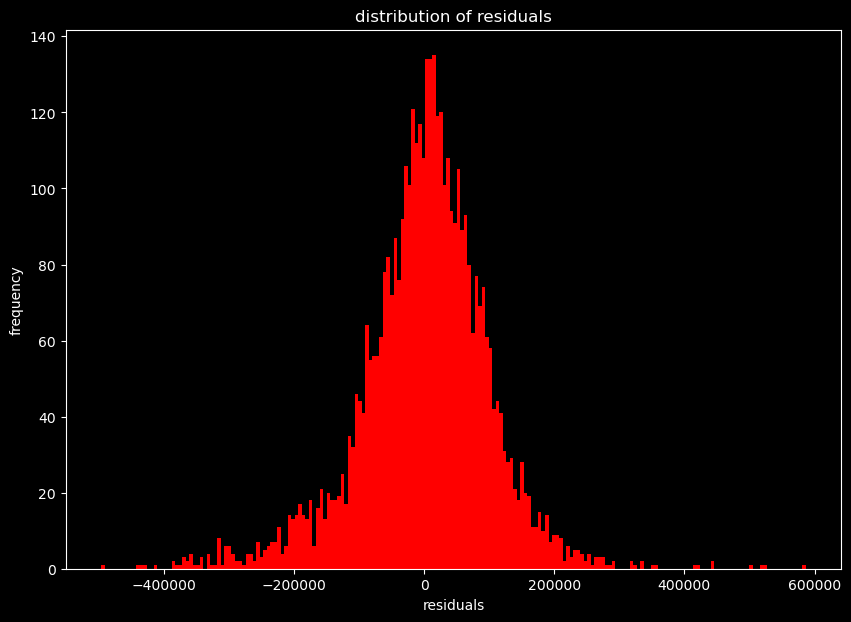

In [44]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel("residuals")
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# residuals follow normal distribution

# Model Coefficients

In [45]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                   'coefficients': model.coef_})
coefficients_table = coefficients_table.sort_values(by = 'coefficients')


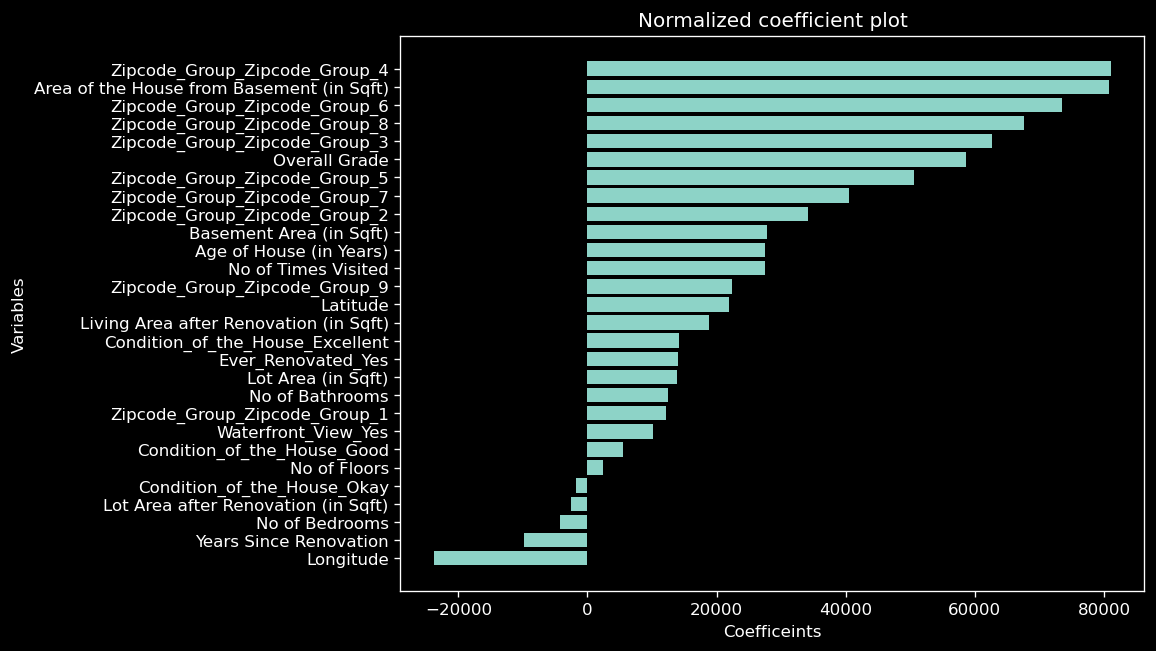

In [46]:
plt.figure(figsize = (8,6), dpi = 120)
x = coefficients_table['column'] # independent variables
y = coefficients_table['coefficients'] # coefficients of independent variables
plt.barh(x,y)
plt.xlabel("Coefficeints")
plt.ylabel("Variables")
plt.title("Normalized coefficient plot")
plt.show()